# sklearn
This is a machine learning library.

## Standard Setup

In [1]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:75% !important; margin-left:350px; }</style>"))
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
pd.set_option( 'display.notebook_repr_html', False)  # render Series and DataFrame as text, not HTML
pd.set_option( 'display.max_column', 10)    # number of columns
pd.set_option( 'display.max_rows', 10)     # number of rows
pd.set_option( 'display.width', 80)        # number of characters per row

## The Library
sklearn **does not automatically import its subpackages**. Therefore all subpakcages must be specifically loaded before use.

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model    import LinearRegression
from sklearn.metrics         import *
import statsmodels.formula.api as smf

## Sample Data
Generate 100 rows of data, with 3x features (X1,X2,X3), and one dependant variable (Y)

In [3]:
n = 100  # number of samples
I = 5  # intercept value
E = np.random.randint( 1,20, n)  # Error
X1 = np.random.randint( 1,n+1, n)
X2 = np.random.randint( 1,n+1, n)
X3 = np.random.randint( 1,n+1, n)
Y = 0.1*X1 + 0.2*X2 + 0.3*X3 + E + I
mydf = pd.DataFrame({
    'Y':Y,
    'X1':X1,
    'X2':X2,
    'X3':X3
})
mydf.shape

(100, 4)

In [4]:
mydf.head()

   X1  X2  X3     Y
0  34  17  66  35.6
1  64  85  61  48.7
2  63  46  89  57.2
3  39  90  77  63.0
4  96  55  53  47.5

## Data Splitting

### Method 1: Split One Dataframe Into Train/Test

```
traindf, testdf = train_test_split( df, test_size=, random_state= ) 
 # random_state : seed number (integer), optional
 # test_size    : fraction of 1, 0.2 means 20%
```

In [5]:
traindf, testdf = train_test_split(mydf,test_size=0.2, random_state=25)

In [6]:
print (len(traindf))
print (len(testdf))

80
20


### Method 2: DataFrame in X,Y, split into x_train/test, y_train/test
```
x_train, x_test, y_train, y_test = train_test_split( X,Y, test_size=, random_state= )
 # random_state : seed number (integer), optional
 # test_size    : fraction of 1, 0.2 means 20%
```

**Split DataFrame into X and Y First**

In [7]:
feature_cols = ['X1','X2','X3']
X = mydf[feature_cols]
Y = mydf.Y

**Then Split X/Y into x_train/test, y_train/test**

In [8]:
x_train, x_test, y_train, y_test = train_test_split( X,Y, test_size=0.2, random_state=25)
print (len(x_train))
print (len(x_test))

80
20


# Linear Regression

## The Library

In [9]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model    import LinearRegression
from sklearn.metrics        import mean_absolute_error, mean_squared_error
import statsmodels.api   as sm

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


## The Math

## Sample Data

### Data Emulation

In [10]:
n = 200  # number of samples
I = 250  # intercept value
E = np.random.randint( 1,20, n)  # Error
X1 = np.random.randint( 1,n+1, n)
X2 = np.random.randint( 1,n+1, n)
X3 = np.random.randint( 1,n+1, n)
Y = 0.1*X1 + 0.2*X2 + 0.3*X3 + E + I

**Put All Data In pandas DataFrame**

In [11]:
mydf = pd.DataFrame({
    'Y':Y,
    'X1':X1,
    'X2':X2,
    'X3':X3
})
mydf.head()

    X1   X2   X3      Y
0  193  127   73  322.6
1   67  185  190  355.7
2  106   98   25  303.7
3   99  180  101  327.2
4   19   34  190  330.7

## Data Preprocessing

The aim is to produce:  
  
X : Test dataframe with feature column(s)  
Y : Test dataframe column of actual value

### Data Validation

Ensure there is **no col-linearity** among the features used

#### Colleration Check

In [12]:
X.corr()

          X1        X2        X3
X1  1.000000 -0.097395 -0.060644
X2 -0.097395  1.000000  0.015964
X3 -0.060644  0.015964  1.000000

#### Matrix Scatter Plot

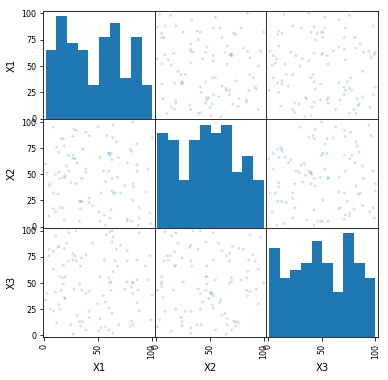

In [13]:
pd.plotting.scatter_matrix(X, alpha=0.2, figsize=(6, 6), diagonal='hist');

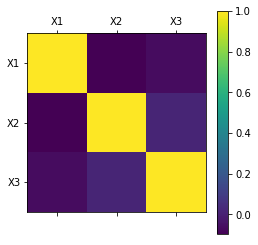

In [14]:
plt.matshow(X.corr())
plt.xticks(range(len(X.columns)), X.columns)
plt.yticks(range(len(X.columns)), X.columns)
plt.colorbar()
plt.show()

## Modeling (scikit-learn)

### Data Preparation

#### Preparing Features and Dependent Value

In [15]:
feature_cols = ['X1','X2','X3']
X = mydf[feature_cols]
Y = mydf.Y

#### Splitting Data Into Training and Test Sets

In [16]:
trainX,testX,trainY,testY = train_test_split(X,Y,test_size=0.2)

### Create The Model

In [17]:
lm = LinearRegression()   # create linear regression object
lm.fit( trainX, trainY )  # train the model using training set

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

### Analyze The Model

In [18]:
lm.intercept_

262.64513922171943

In [19]:
lm.coef_

array([ 0.0866551 ,  0.19594499,  0.29353195])

### Evaluate The Model

#### Mean Absolute Error (MAE)

In [20]:
mean_absolute_error( testY, predY )

NameError: name 'predY' is not defined

#### Mean Squared Error (MSE)

In [ ]:
mean_squared_error( testY, predY )

#### Root Mean Squared Error (RMSE)

In [ ]:
math.sqrt( mean_squared_error( testY, predY ) )

#### R-Squared

In [ ]:
r2_score( testY, predY )

## Modeling (statsmodel)

### Data Preparation
Splitting data into training set and testing set.

In [ ]:
traindf, testdf = train_test_split(mydf, test_size=0.2)
trainX,testX,trainY,testY = train_test_split(X,Y,test_size=0.2)

### Create The Model - Equation Method

In [ ]:
fit = smf.ols(formula='Y ~ X1 + X2 + X3', data=traindf).fit()

#### Evaluate The Model

In [ ]:
print (fit.summary())

### Create The Model - Array Method
**intercept** is not included in OLS modeling by default. Hence need to use add_constant() to training dataset in order to display intercept estimate.

In [ ]:
trainX = sm.add_constant(trainX)     # this add new column of all value 1
fit2 = smf.OLS(trainY, trainX).fit()

#### Evaluate The Model

In [ ]:
print (fit2.summary())

## Prediction

### Performance

In [ ]:
lm.predict( testX )

## Feature Selection

The advantage of using skcikit-learn package is that it has this particular method selection, works more or less like backward selection (not exactly), and is called **Recursive Feature**. How it works:

- Model run with all variables, weight is assigned to each variable
- Variable with smallest weight will be pruned from next iteration
- Run the model again till the number of desired features is left

### The Library

In [ ]:
from sklearn.feature_selection import RFE
from sklearn.svm import SVR

In [ ]:
estimator = SVR(kernel='linear')       # we are using linear model
selector = RFE (estimator, 2, step=1)  # we want just 2 features
selector = selector.fit(X,Y)           # execute

In [ ]:
selector.support_

In [ ]:
selector.ranking_

In [ ]:
selector.estimator_